In [1]:

import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.



C:\Users\Rashed\Anaconda3\envs\tenserflow\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 28s 2us/step


In [3]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(26,activation='softmax')(x) #final layer with softmax activation


In [4]:

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [6]:
print(len(model.layers))

92


In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [13]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies


In [14]:

train_generator=train_datagen.flow_from_directory('/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/color/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 31088 images belonging to 26 classes.


In [16]:
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "CrowdAI Classification Custo-model(MobileNet) -epoch-10-{}".format(int(time.time())) #save each different model

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [17]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [18]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                   callbacks=[tensorboard])

Epoch 1/10
971/971 [==============================] - 202s 208ms/step - loss: 0.4126 - acc: 0.8805
Epoch 2/10
971/971 [==============================] - 195s 201ms/step - loss: 0.2015 - acc: 0.9444
Epoch 3/10
971/971 [==============================] - 195s 201ms/step - loss: 0.1544 - acc: 0.9574
Epoch 4/10
971/971 [==============================] - 195s 201ms/step - loss: 0.1329 - acc: 0.9649
Epoch 5/10
971/971 [==============================] - 196s 201ms/step - loss: 0.1140 - acc: 0.9691
Epoch 6/10
971/971 [==============================] - 195s 201ms/step - loss: 0.1110 - acc: 0.9702
Epoch 7/10
971/971 [==============================] - 195s 201ms/step - loss: 0.1145 - acc: 0.9715
Epoch 8/10
971/971 [==============================] - 195s 200ms/step - loss: 0.0848 - acc: 0.9773
Epoch 9/10
971/971 [==============================] - 195s 201ms/step - loss: 0.0878 - acc: 0.9780
Epoch 10/10
971/971 [==============================] - 195s 201ms/step - loss: 0.0730 - acc: 0.9814


In [19]:
#saving model
filepath="/home/mazumder_8100/crowdAi/models/model(MobileNet).hdf5"
model.save(filepath)

In [21]:
# import cv2
# import matplotlib.pyplot as plt
# from keras.preprocessing.image import img_to_array

In [36]:
from IPython.display import Image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.applications import imagenet_utils

In [32]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

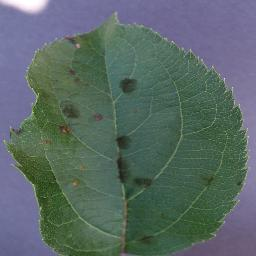

In [33]:
Image(filename="/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/Test/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG")

In [ ]:
preprocessed_image = prepare_image("/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/Test/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG")
predictions = model.predict(preprocessed_image)
predictions_class = model.predict_generator(preprocessed_image)

In [ ]:
IMG_SIZE = 256
img_array = cv2.imread("/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/Test/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG") 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #RESIZE MAGES
img_array = img_to_array(new_array)


plt.imshow(new_array)
plt.show()
img_array

In [41]:
print(train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4, 'Corn_(maize)___Common_rust_': 5, 'Corn_(maize)___Northern_Leaf_Blight': 6, 'Corn_(maize)___healthy': 7, 'Grape___Black_rot': 8, 'Grape___Esca_(Black_Measles)': 9, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 10, 'Grape___healthy': 11, 'NotLeaf': 12, 'Potato___Early_blight': 13, 'Potato___Late_blight': 14, 'Potato___healthy': 15, 'Tomato___Bacterial_spot': 16, 'Tomato___Early_blight': 17, 'Tomato___Late_blight': 18, 'Tomato___Leaf_Mold': 19, 'Tomato___Septoria_leaf_spot': 20, 'Tomato___Spider_mites Two-spotted_spider_mite': 21, 'Tomato___Target_Spot': 22, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 23, 'Tomato___Tomato_mosaic_virus': 24, 'Tomato___healthy': 25}


In [48]:
del model

In [49]:
from keras.models import load_model

In [50]:
model = load_model("/home/mazumder_8100/crowdAi/models/model(MobileNet).hdf5")

print("MODEL-LOADED")

MODEL-LOADED


## Test Generator

In [51]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies


In [52]:
test_generator = test_datagen.flow_from_directory(
    directory='/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/Test',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 250 images belonging to 25 classes.


In [57]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=306/32)


10/9 [===============================] - 1s 100ms/step


In [59]:
predicted_class_indices=np.argmax(pred,axis=1)

In [62]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [76]:
preprocessed_image = prepare_image("/home/mazumder_8100/crowdAi/CustomDataset/Custom-Train-Test(color)/Test/NotLeaf/download.jpg")
predictions = model.predict(preprocessed_image)


In [77]:
predicted_class_indices=np.argmax(predictions,axis=1)
predicted_class_indices

array([12])

In [78]:
labels[int(predicted_class_indices)]

'NotLeaf'